<a href="https://colab.research.google.com/github/reymage/2021-pydantic/blob/main/indrive_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
! pip install google-play-scraper

!pip install vaderSentiment==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [51]:
from google_play_scraper import app, Sort, reviews_all, reviews
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# from app_store_scraper import AppStore
# import json, os, uuid

In [19]:
# Lt's scrape the data
play_id = "sinet.startup.inDriver"
# app_id = 780125801

# Define the app ID for inDrive
app_id = 'com.indriver.client'  # Replace with the actual app ID if different

# Set up variables for pagination and unique reviews
all_reviews = []
review_ids = set()
continuation_token = None
max_reviews_per_request = 200  # Number of reviews to fetch per request
total_reviews_to_fetch = 50000   # Total number of reviews to fetch
fetched_reviews_count = 0

while fetched_reviews_count < total_reviews_to_fetch:
    # Calculate how many reviews to fetch in this iteration
    remaining_reviews = total_reviews_to_fetch - fetched_reviews_count
    current_fetch_count = min(max_reviews_per_request, remaining_reviews)

    # Fetch reviews with pagination
    fetched_reviews, continuation_token = reviews(
        play_id,
        lang='en',  # Language of the reviews
        country='NG',  # Country code for Nigeria
        sort=Sort.NEWEST,  # Sort by newest reviews
        count=current_fetch_count,  # Number of reviews to fetch
        continuation_token=continuation_token  # Pagination token
    )

    for review in fetched_reviews:
        if review['reviewId'] not in review_ids:
            review_ids.add(review['reviewId'])  # Store unique review ID
            all_reviews.append(review)  # Add unique review to the list
            fetched_reviews_count += 1    # Increment count of fetched reviews

    # Break if no more reviews are available (no continuation token)
    if not continuation_token or fetched_reviews_count >= total_reviews_to_fetch:
        break
    if continuation_token and not fetched_reviews:  # I inserted this if statement myself.
        break  # Exit loop if no more reviews

# Convert the list of unique reviews to a DataFrame for easier manipulation
df_reviews = pd.DataFrame(all_reviews)

# Display the first few rows of the DataFrame
print(df_reviews.head())

# Optionally, save to a CSV file
df_reviews.to_csv('indrive_nigeria_reviews.csv', index=False)

                               reviewId                      userName  \
0  625a5a3e-8846-4320-9272-c197604c3623                        Ragu S   
1  243d2cf0-3bc5-489c-b8bf-5058241349c6                  Ezzataly Aly   
2  59b18252-5f9c-4105-b455-482442e58a4f  Roman Shcherbakov (Flameash)   
3  11401991-f35d-4f4f-a86e-20e4fed67d55                Muhammed Kabir   
4  1d072b4b-5717-4235-87d1-9ee91b907a32              Alejandro Loredo   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  பயணி ஒருகுறிப்பிட்ட வாகனத்தை தேர்ந்தெடுக்கிற இ...      1              0   
1                                          Very well      5         

In [20]:
# find shape of data
df_reviews.shape

(50000, 11)

In [28]:
# check first five rows
df_reviews.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,625a5a3e-8846-4320-9272-c197604c3623,Ragu S,https://play-lh.googleusercontent.com/a/ACg8oc...,பயணி ஒருகுறிப்பிட்ட வாகனத்தை தேர்ந்தெடுக்கிற இ...,1,0,None,2024-10-19 00:30:17,None,NaT,None
1,243d2cf0-3bc5-489c-b8bf-5058241349c6,Ezzataly Aly,https://play-lh.googleusercontent.com/a/ACg8oc...,Very well,5,0,5.98.1,2024-10-18 23:29:45,None,NaT,5.98.1
2,59b18252-5f9c-4105-b455-482442e58a4f,Roman Shcherbakov (Flameash),https://play-lh.googleusercontent.com/a-/ALV-U...,"Doesn't work. Can't register, can't get online...",1,0,5.99.0,2024-10-18 23:24:31,None,NaT,5.99.0
3,11401991-f35d-4f4f-a86e-20e4fed67d55,Muhammed Kabir,https://play-lh.googleusercontent.com/a/ACg8oc...,Very wicked set of people managing the app. St...,1,0,5.91.0,2024-10-18 23:05:38,None,NaT,5.91.0
4,1d072b4b-5717-4235-87d1-9ee91b907a32,Alejandro Loredo,https://play-lh.googleusercontent.com/a-/ALV-U...,Good App,5,0,5.98.1,2024-10-18 21:59:42,None,NaT,5.98.1


In [29]:
# drop columns reviewId, userImage. Change the column titles: content to review, at to reviewDate
df_reviews = df_reviews.drop(['reviewId', 'userImage'], axis=1)
df_reviews = df_reviews.rename(columns={'content': 'review', 'at': 'reviewDate'})

In [30]:
df_reviews.head(5)

,userName,review,score,thumbsUpCount,reviewCreatedVersion,reviewDate,replyContent,repliedAt,appVersion
0,Ragu S,பயணி ஒருகுறிப்பிட்ட வாகனத்தை தேர்ந்தெடுக்கிற இ...,1,0,None,2024-10-19 00:30:17,None,NaT,None
1,Ezzataly Aly,Very well,5,0,5.98.1,2024-10-18 23:29:45,None,NaT,5.98.1
2,Roman Shcherbakov (Flameash),"Doesn't work. Can't register, can't get online...",1,0,5.99.0,2024-10-18 23:24:31,None,NaT,5.99.0
3,Muhammed Kabir,Very wicked set of people managing the app. St...,1,0,5.91.0,2024-10-18 23:05:38,None,NaT,5.91.0
4,Alejandro Loredo,Good App,5,0,5.98.1,2024-10-18 21:59:42,None,NaT,5.98.1


In [31]:
# remove all reviews that are not in English language. You identify this when they are not English character
df_reviews = df_reviews[df_reviews['review'].str.contains(r'[^\x00-\x7F]+') == False]

In [36]:
df_reviews.shape
df_reviews.head(5)

,userName,review,score,thumbsUpCount,reviewCreatedVersion,reviewDate,replyContent,repliedAt,appVersion
1,Ezzataly Aly,Very well,5,0,5.98.1,2024-10-18 23:29:45,None,NaT,5.98.1
2,Roman Shcherbakov (Flameash),"Doesn't work. Can't register, can't get online...",1,0,5.99.0,2024-10-18 23:24:31,None,NaT,5.99.0
3,Muhammed Kabir,Very wicked set of people managing the app. St...,1,0,5.91.0,2024-10-18 23:05:38,None,NaT,5.91.0
4,Alejandro Loredo,Good App,5,0,5.98.1,2024-10-18 21:59:42,None,NaT,5.98.1
6,Santhiya Sri,The worst driver app. If you lauch complain on...,1,0,5.98.1,2024-10-18 21:47:07,None,NaT,5.98.1


In [38]:
# check the datatype of all the columns
df_reviews.dtypes

,0
userName,object
review,object
score,int64
thumbsUpCount,int64
reviewCreatedVersion,object
reviewDate,datetime64[ns]
replyContent,object
repliedAt,datetime64[ns]
appVersion,object


In [42]:
# convert the columns username to string, review to string, reviewCreatedVersion to string, replyContent to string
df_reviews['userName'] = df_reviews['userName'].astype(pd.StringDtype())
df_reviews['review'] = df_reviews['review'].astype(pd.StringDtype())
df_reviews['reviewCreatedVersion'] = df_reviews['reviewCreatedVersion'].astype(pd.StringDtype())
df_reviews.dtypes

,0
userName,string[python]
review,string[python]
score,int64
thumbsUpCount,int64
reviewCreatedVersion,string[python]
reviewDate,datetime64[ns]
replyContent,object
repliedAt,datetime64[ns]
appVersion,object


In [50]:
# Analyse data for sentiment
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
  scores = analyzer.polarity_scores(text)
  compound_score = scores['compound']

  if compound_score >= 0.05:
    return 'Positive'
  elif compound_score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

df_reviews['sentiment'] = df_reviews['review'].apply(get_sentiment)
df_reviews = df_reviews[['userName', 'review', 'sentiment', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'repliedAt', 'reviewDate']]
df_reviews.head(16)

<ipython-input-50-d600a892946b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['sentiment'] = df_reviews['review'].apply(get_sentiment)


,userName,review,sentiment,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,reviewDate
1,Ezzataly Aly,Very well,Positive,5,0,5.98.1,None,NaT,2024-10-18 23:29:45
2,Roman Shcherbakov (Flameash),"Doesn't work. Can't register, can't get online...",Positive,1,0,5.99.0,None,NaT,2024-10-18 23:24:31
3,Muhammed Kabir,Very wicked set of people managing the app. St...,Negative,1,0,5.91.0,None,NaT,2024-10-18 23:05:38
4,Alejandro Loredo,Good App,Positive,5,0,5.98.1,None,NaT,2024-10-18 21:59:42
6,Santhiya Sri,The worst driver app. If you lauch complain on...,Negative,1,0,5.98.1,None,NaT,2024-10-18 21:47:07
7,Ali Jatoi blouch,Nice,Positive,5,0,5.98.1,None,NaT,2024-10-18 21:09:48
8,Abdul Razique,very good,Positive,5,0,5.98.1,None,NaT,2024-10-18 21:02:23
9,sadia arshad,Good,Positive,5,0,None,None,NaT,2024-10-18 21:00:39
10,Hilsmart Castillo,Very useless application. I can't travel becau...,Negative,1,0,5.97.0,None,NaT,2024-10-18 20:49:29
12,Syeda Laiba,good experience,Positive,5,0,None,None,NaT,2024-10-18 20:44:21


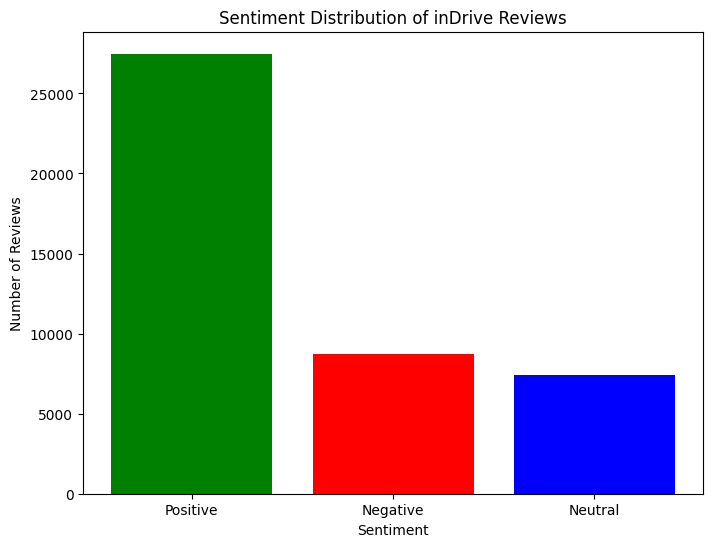

In [52]:
# plot the sentiment distribution in a graph

# Count the occurrences of each sentiment
sentiment_counts = df_reviews['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of inDrive Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()